In [4]:
%cd /content/drive/MyDrive/DocumentUpskilling

/content/drive/MyDrive/DocumentUpskilling


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Loading Image Files

In [32]:
image_files = os.listdir("dataset/citizenship")
image_files = [f"dataset/citizenship/{image}" for image in image_files]

In [33]:
image_files

['dataset/citizenship/images.jpg',
 'dataset/citizenship/FzdWj1laIAEH0bC.jpg',
 'dataset/citizenship/thumb.jpg',
 'dataset/citizenship/Sanu-Thing.jpg',
 'dataset/citizenship/download.jpg',
 'dataset/citizenship/CpvQJpwWIAAGJEd.jpg',
 'dataset/citizenship/a35bade8-2390-4989-84be-b952ae3acea7.jpg',
 'dataset/citizenship/images_1.jpg',
 'dataset/citizenship/images_2.jpg']

In [5]:
def blur_and_save(input_path, output_path, blur_strength=5):
    # Read the image
    image = cv2.imread(input_path)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (blur_strength, blur_strength), 0)

    # Save the blurred image
    cv2.imwrite(output_path, blurred_image)

In [6]:
%cd /content/drive/MyDrive/DocumentUpskilling/dataset

/content/drive/MyDrive/DocumentUpskilling/dataset


In [7]:
output_folder = 'blurred_citizenship'
os.makedirs(output_folder, exist_ok=True)

In [ ]:
for image_file in image_files:
    input_path = image_file
    output_path = os.path.join(output_folder, os.path.basename(image_file))
    blur_and_save(input_path, output_path, blur_strength=15)

In [16]:
# Function to display image
def display_image(image_path: str):
  """
  a simple function to display image
  image_path (str): path of image file
  """
  img = plt.imread(image_path)
  plt.imshow(img, cmap=plt.cm.gray)
  plt.axis('off');

# Image Deblurring

In [11]:
# Examples of blurred images
blurred_image_files = os.listdir("/content/drive/MyDrive/DocumentUpskilling/dataset/blurred_citizenship/test/blur")
blurred_image_files = [f"/content/drive/MyDrive/DocumentUpskilling/dataset/blurred_citizenship/test/blur/{image}" for image in blurred_image_files]
blurred_image_files[:5]

['/content/drive/MyDrive/DocumentUpskilling/dataset/blurred_citizenship/test/blur/images.jpg',
 '/content/drive/MyDrive/DocumentUpskilling/dataset/blurred_citizenship/test/blur/FzdWj1laIAEH0bC.jpg',
 '/content/drive/MyDrive/DocumentUpskilling/dataset/blurred_citizenship/test/blur/thumb.jpg',
 '/content/drive/MyDrive/DocumentUpskilling/dataset/blurred_citizenship/test/blur/Sanu-Thing.jpg',
 '/content/drive/MyDrive/DocumentUpskilling/dataset/blurred_citizenship/test/blur/download.jpg']

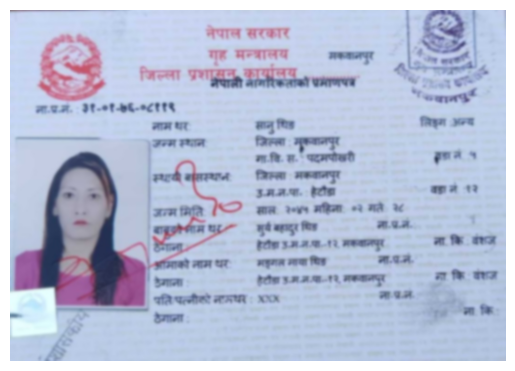

In [23]:
display_image(blurred_image_files[3])

In [24]:
%cd /content/drive/MyDrive/DocumentUpskilling/image_preprocessing

/content/drive/MyDrive/DocumentUpskilling/image_preprocessing


In [25]:
!git clone https://github.com/chosj95/MIMO-UNet.git

fatal: destination path 'MIMO-UNet' already exists and is not an empty directory.


In [26]:
%cd MIMO-UNet

/content/drive/MyDrive/DocumentUpskilling/image_preprocessing/MIMO-UNet


In [45]:
import torch
from torchvision.io import read_image
import torchvision.transforms as T
from torchvision.transforms import functional as F

from models.MIMOUNet import build_net
from utils import Adder

## Blurriness
- Image Sharpening
- Image Deblurring


### Image Deblurring

In [29]:
model_names = ['MIMO-UNet', 'MIMO-UNetPlus']

In [30]:
model = build_net(model_names[0])

In [31]:
state_dict = torch.load("/content/drive/MyDrive/DocumentUpskilling/models/MIMO-UNet.pkl", map_location=torch.device('cpu'))
model.load_state_dict(state_dict['model'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.empty_cache()
adder = Adder()
model.eval()

MIMOUNet(
  (Encoder): ModuleList(
    (0): EBlock(
      (layers): Sequential(
        (0): ResBlock(
          (main): Sequential(
            (0): BasicConv(
              (main): Sequential(
                (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (1): ReLU(inplace=True)
              )
            )
            (1): BasicConv(
              (main): Sequential(
                (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              )
            )
          )
        )
        (1): ResBlock(
          (main): Sequential(
            (0): BasicConv(
              (main): Sequential(
                (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (1): ReLU(inplace=True)
              )
            )
            (1): BasicConv(
              (main): Sequential(
                (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              )
          

In [79]:
from PIL import Image as Image
import torchvision.transforms as transforms

In [63]:
transform = transforms.RandomCrop(256)

In [75]:
input_image = Image.open(blurred_image_files[3])
input_image = transform(input_image)
input_image = F.to_tensor(input_image)
input_image = input_image.to(device)

In [71]:
print(input_image.shape)

torch.Size([256, 256, 3])


In [78]:
# pred = model(input_image)

### Image Sharpening

In [83]:
sharpen_filter=np.array([[-1,-1,-1],
                 [-1,9,-1],
                [-1,-1,-1]])

In [85]:
def sharpen_image(blurred_image_path):
    original= cv2.imread(blurred_image_path, cv2.IMREAD_UNCHANGED)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Remove axis labels
    plt.show()
    print("Blur Image")

    # create a sharpening kernel
    sharpen_filter=np.array([[-1,-1,-1],
                    [-1,9,-1],
                    [-1,-1,-1]])

    # applying kernels to the input image to get the sharpened image

    sharp_image=cv2.filter2D(original,-1,sharpen_filter)
    plt.imshow(cv2.cvtColor(sharp_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Remove axis labels
    plt.show()
    print("Sharpened Image")

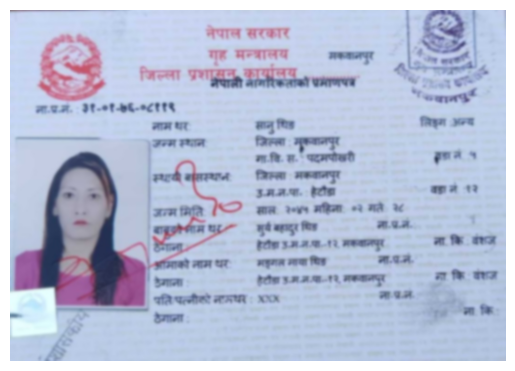

Blur Image


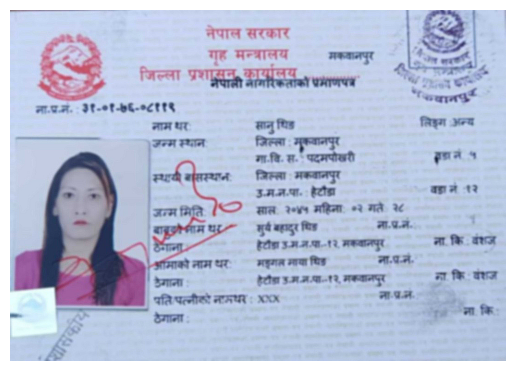

Sharpened Image


In [89]:
sharpen_image(blurred_image_files[3])

## Low Resolution
- Image Upscaling
- Image Interpolation


### Image Upscaling

In [ ]:
!wget https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x2.pb

--2024-01-09 05:29:43--  https://github.com/Saafke/EDSR_Tensorflow/raw/master/models/EDSR_x2.pb
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Saafke/EDSR_Tensorflow/master/models/EDSR_x2.pb [following]
--2024-01-09 05:29:43--  https://raw.githubusercontent.com/Saafke/EDSR_Tensorflow/master/models/EDSR_x2.pb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38490162 (37M) [application/octet-stream]
Saving to: ‘EDSR_x2.pb’

EDSR_x2.pb          100%[===================>]  36.71M  52.8MB/s    in 0.7s    

2024-01-09 05:29:44 (52.8 MB/s) - ‘EDSR_x2.pb’ saved [38490162/38490162]



In [5]:
from cv2 import dnn_superres

In [6]:
# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

In [24]:
def image_upscaling(image_path:str, model_path:str, output_folder:str):

    # Read image
    image = cv2.imread(image_path)

    # Read the desired model
    sr.readModel(model_path)

    # Set the desired model and scale to get correct pre- and post-processing
    sr.setModel("edsr", 3)

    # Upscale the image
    print("Upscaling........")
    result = sr.upsample(image)
    print("Upscaling Finished")

    # Save the image
    image_name = image_path.split("/")[-1].split(".")[0]
    save_path = f"{output_folder}/{image_name}_upscaled.png"
    cv2.imwrite(save_path, result)
    return save_path

In [25]:
output = image_upscaling(blurred_image_files[3],"models/EDSR_x2.pb", "dataset/output")

Upscaling........
Upscaling Finished


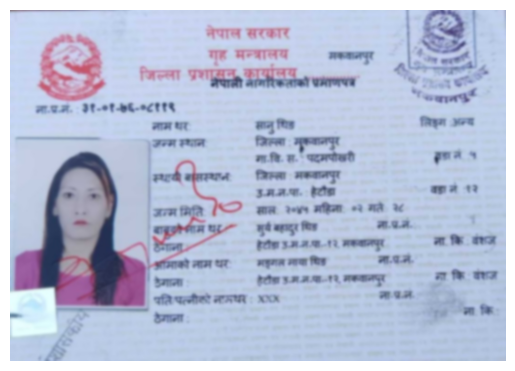

In [29]:
display_image(blurred_image_files[3])

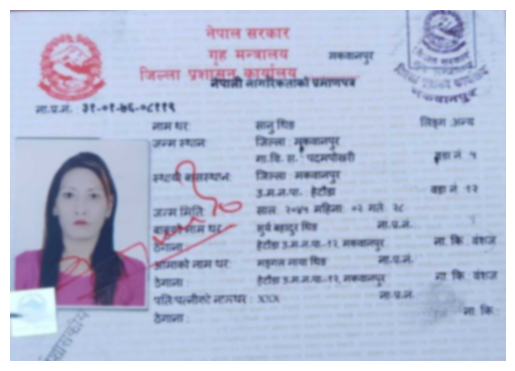

In [28]:
display_image(output)

## Noise
- Image Denoising
- Image Smoothing


In [93]:
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

### Image Denoising

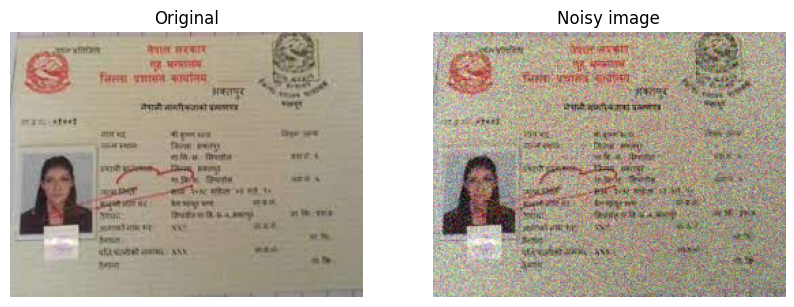

In [ ]:
# Adding some random noise

from skimage.util import random_noise

test_img = plt.imread(image_files[4])

# Add noise to the image
noisy_image = random_noise(test_img)

# Show th original and resulting image
plot_comparison(test_img, noisy_image, 'Noisy image')

In [ ]:
from skimage.restoration import denoise_tv_chambolle

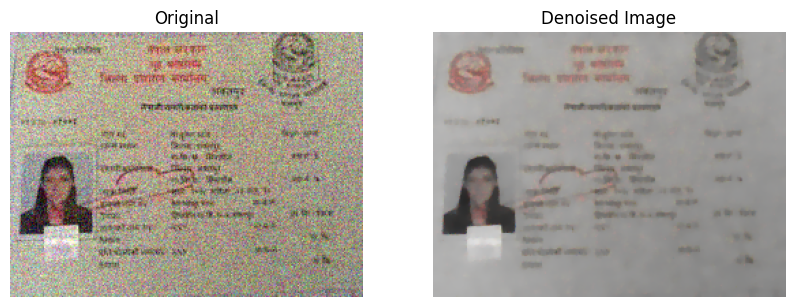

In [ ]:
# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image)

# Show the noisy and denoised image
plot_comparison(noisy_image, denoised_image, 'Denoised Image')

<ipython-input-44-1f08c195e92b>:4: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_bilateral(noisy_image, multichannel=True)


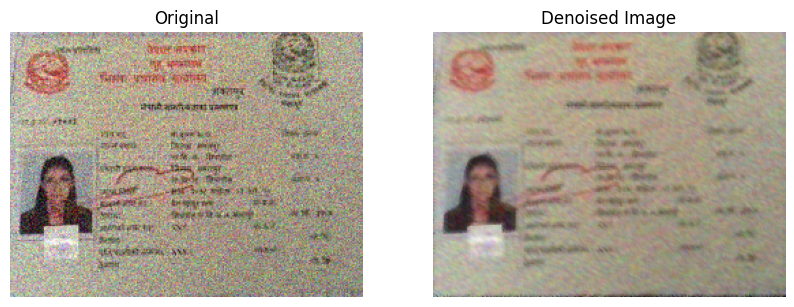

In [ ]:
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(noisy_image, multichannel=True)

# Show original and resulting images
plot_comparison(noisy_image, denoised_image, 'Denoised Image')

## Distortion
- Image Cropping
- Image Straightening



### Image Straightening

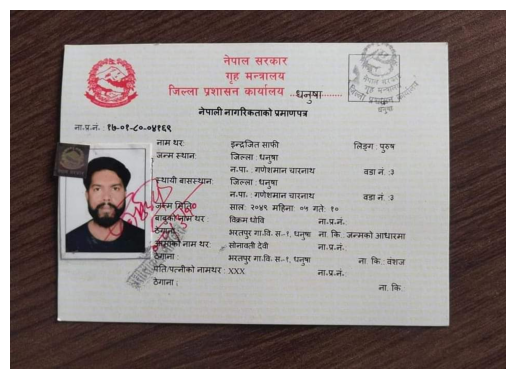

In [45]:
display_image(image_files[1])

## Damage
- Image Restoration
- Image Inpainting



### Image Inpainting

In [34]:
def create_damaged_image(original_image_path, damage_intensity, save_path):
    # Load the original image
    original_image = cv2.imread(original_image_path)

    # Create a random mask with the same size as the original image
    mask = np.random.randint(0, 255, original_image.shape, dtype=np.uint8)

    # Apply the mask to the original image to create the damaged image
    damaged_image = cv2.addWeighted(original_image, 1 - damage_intensity, mask, damage_intensity, 0)

    # Save the damaged image
    cv2.imwrite(save_path, damaged_image)

    # Save the mask
    mask_path = save_path.replace('.png', '_mask.png')
    cv2.imwrite(mask_path, mask)

    return damaged_image, mask

## Partial Occlusion
- Image Cropping
- Image Segmentation



## Oblique Lighting
- Image Brightness Adjustment
- Image Contrast Adjustment
- humanImage Filtering

